In [71]:
import gmaps
import numpy as np
import pandas as pd
import os
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import linregress
from sklearn import linear_model
import statsmodels.api as sm
from api_keys import gkey
import requests

#This is the general/common section
path = pd.read_csv('../01._Prospective_Project_Data/1._72199_158097_compressed_indeed_job_dataset.csv/indeed_job_dataset_V3_CSV.csv')
df = pd.DataFrame(path)
df

# df.fillna(0) 
# df

path2 = pd.read_csv('../01._Prospective_Project_Data/BLS_Data/OES_Report-V2.csv')
BLS_df = pd.DataFrame(path2)
BLS_df
BLS_df["Annual mean wage(2)"] = BLS_df["Annual mean wage(2)"].str.replace(",","")
BLS_df["Annual mean wage(2)"] = BLS_df["Annual mean wage(2)"].astype("float64")
BLS_df = BLS_df.groupby('State_Two-Letter').agg({"Annual mean wage(2)":"mean"}).reset_index()
# # BLS_df
# # BLS_df = pd.DataFrame(BLS_df).mean()
BLS_df

path3 = pd.read_csv('../01._Prospective_Project_Data/Consumer_Price_Data/CPI_Data_V2_No_DC.csv')
CPI_df = pd.DataFrame(path3)
CPI_df
spc_cpi=CPI_df[["State","costIndex"]]

spc_cpi = spc_cpi.rename(columns={'State':'State Two-Letter'})
spc_cpi


df_grouped= df.groupby('Location')['Salary_Index'].agg(['mean','median', 'var', 'std', 'sem']).reset_index()
df_grouped = pd.DataFrame(df_grouped)
df_grouped
df_grouped

df_grouped = df_grouped.rename(columns={'Location':'State_Two-Letter'})
df_grouped

merge_df = pd.merge(BLS_df, df_grouped, how='left', on='State_Two-Letter')      
merge_df
merge_df = pd.merge(merge_df, CPI_df, how='left', on='State_Two-Letter')      
merge_df

# Drop observations/rows with "0" values for "Number of Skills" column 
df_cleaned = df.dropna(subset=['No_of_Skills'])

# Examine df
# df_cleaned.head()
df_cleaned



,Index_No,Job_Type,Job_Title,Link,Queried_Salary,<80000,80000-99999,100000-119999,120000-139999,140000-159999,...,spss,softwaredevelopment,shellscripting,datascience,docker,mongodb,.net,projectmanagement,businessintelligence,s3
0,0.0,data_scientist,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,data_scientist,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,data_scientist,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,data_scientist,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,data_scientist,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710.0,data_engineer,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
5711,5711.0,data_engineer,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
5712,5712.0,data_engineer,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5713,5713.0,data_engineer,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
# merge_df2 = pd.merge(merge_df, spc_cpi, how='left', on='State Two-Letter')      
# merge_df2
merge_df["Dec_CPI"]=merge_df["costIndex"]/100
merge_df2=merge_df
merge_df2["Labor-Calculated"]=merge_df2["Annual mean wage(2)"]/merge_df2["Dec_CPI"]
merge_df2
merge_df2["Gains/Loss-Labor Stats"]=merge_df2["Labor-Calculated"]-merge_df2["Annual mean wage(2)"]
merge_df2

merge_df2["New_Income"]=merge_df2["median"]
merge_df2
merge_df3=merge_df2.replace(to_replace = 1.0,value=70000)
merge_df3=merge_df3.replace(to_replace = 2.0,value=90000)
merge_df3=merge_df3.replace(to_replace = 3.0,value=110000)
merge_df3=merge_df3.replace(to_replace = 4.0,value=130000)
merge_df3=merge_df3.replace(to_replace = 5.0,value=150000)
merge_df3=merge_df3.replace(to_replace = 6.0,value=170000)
merge_df3=merge_df3.replace(to_replace = 2.5,value=110000)
merge_df3=merge_df3.dropna()

merge_df3.head()

merge_df3

merge_df3["Indeed-Calculated"]=merge_df3["New_Income"]/merge_df3["Dec_CPI"]
merge_df3["Gains/Loss-Indeed Stats"]=merge_df3["Indeed-Calculated"]-merge_df3["Labor-Calculated"]
merge_df3


merge_df4=merge_df3[["State_Two-Letter", "Annual mean wage(2)", "Dec_CPI","Labor-Calculated","Gains/Loss-Labor Stats", "New_Income", "Indeed-Calculated","Gains/Loss-Indeed Stats"]]
merge_df5=merge_df4.sort_values(by="Gains/Loss-Indeed Stats",ascending=False)
merge_df5


,State_Two-Letter,Annual mean wage(2),Dec_CPI,Labor-Calculated,Gains/Loss-Labor Stats,New_Income,Indeed-Calculated,Gains/Loss-Indeed Stats
2,AR,42690.0,0.869,49125.431530,6435.431530,110000.0,126582.278481,77456.846951
36,OK,45620.0,0.870,52436.781609,6816.781609,110000.0,126436.781609,74000.000000
16,KS,46520.0,0.890,52269.662921,5749.662921,110000.0,123595.505618,71325.842697
13,ID,44890.0,0.923,48634.886241,3744.886241,110000.0,119176.598050,70541.711809
12,IA,47330.0,0.901,52530.521643,5200.521643,110000.0,122086.570477,69556.048835
40,SC,44380.0,0.959,46277.372263,1897.372263,110000.0,114702.815433,68425.443170
29,NE,48250.0,0.908,53138.766520,4888.766520,110000.0,121145.374449,68006.607930
50,WY,49760.0,0.893,55722.284434,5962.284434,110000.0,123180.291153,67458.006719
35,OH,49430.0,0.908,54438.325991,5008.325991,110000.0,121145.374449,66707.048458
43,TX,50490.0,0.915,55180.327869,4690.327869,110000.0,120218.579235,65038.251366


Text(0, 0.5, 'Delta Gains ($)')

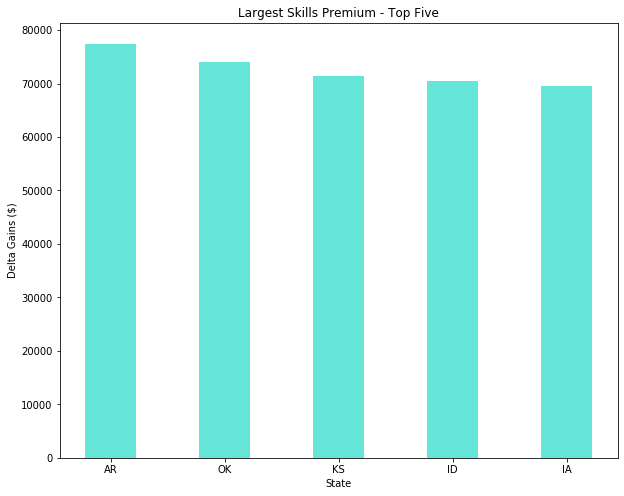

In [73]:
# Top 5
top_5=merge_df5.set_index("State_Two-Letter")
top_5=top_5["Gains/Loss-Indeed Stats"]
top_5=pd.DataFrame(top_5.nlargest(5))
top_5=top_5.rename(columns={"Gains/Loss-Indeed Stats":"Delta Gains"})
top_5


y_axis=top_5["Delta Gains"]
x_axis = [1,2,3,4,5]

plt.figure(figsize=(10,8))

width=0.45
plt.bar(x_axis, y_axis, width, color='turquoise', alpha=0.8, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["AR", "OK", "KS", "ID", "IA"])


plt.title("Largest Skills Premium - Top Five")
plt.xlabel("State")
plt.ylabel("Delta Gains ($)")


Text(0, 0.5, 'Delta Gains ($)')

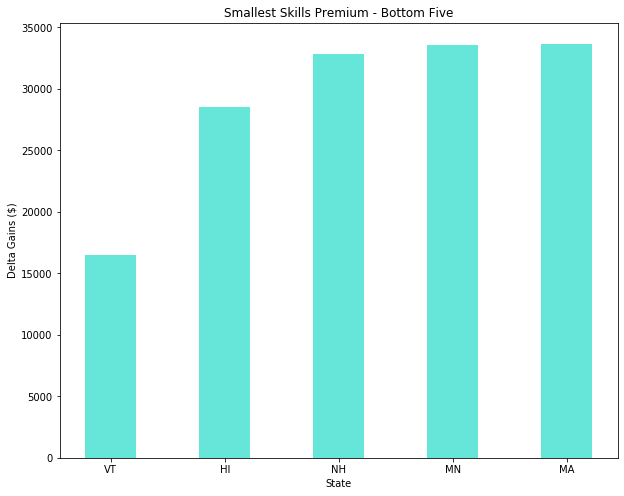

In [74]:
# Bottom 5
bottom_5=merge_df5.set_index("State_Two-Letter")
bottom_5=bottom_5["Gains/Loss-Indeed Stats"]
bottom_5=pd.DataFrame(bottom_5.nsmallest(5))
bottom_5=bottom_5.rename(columns={"Gains/Loss-Indeed Stats":"Delta Gains"})
bottom_5

y_axis=bottom_5["Delta Gains"]
x_axis = [1,2,3,4,5]

plt.figure(figsize=(10,8))

width=0.45
plt.bar(x_axis, y_axis, width, color='turquoise', alpha=0.8, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["VT", "HI", "NH", "MN", "MA"])


plt.title("Smallest Skills Premium - Bottom Five")
plt.xlabel("State")
plt.ylabel("Delta Gains ($)")


Text(0, 0.5, 'Delta Gains ($)')

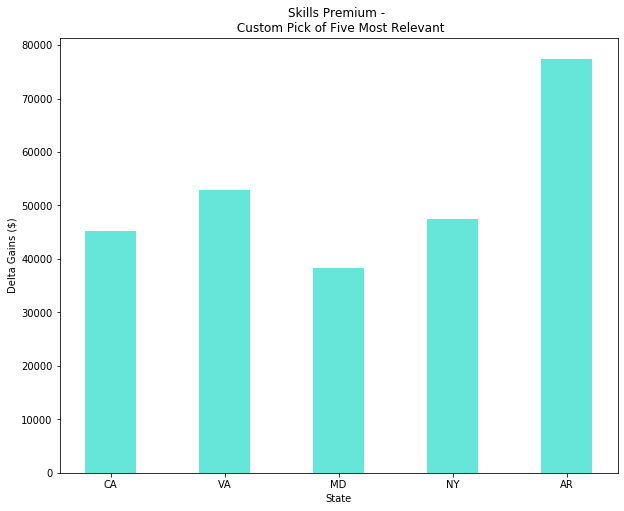

In [75]:
# Custom 5
select_5=merge_df5.set_index("State_Two-Letter")
select_5=select_5.loc[["CA","VA","MD","NY","AR"],:]
select_5=select_5["Gains/Loss-Indeed Stats"]
select_5=pd.DataFrame(select_5)
select_5=select_5.rename(columns={"Gains/Loss-Indeed Stats":"Delta Gains"})
select_5

y_axis=select_5["Delta Gains"]
x_axis = [1,2,3,4,5]

plt.figure(figsize=(10,8))

width=0.45
plt.bar(x_axis, y_axis, width, color='turquoise', alpha=0.8, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["CA", "VA", "MD", "NY", "AR"])


plt.title("Skills Premium - \n Custom Pick of Five Most Relevant")
plt.xlabel("State")
plt.ylabel("Delta Gains ($)")

                Job_Type
data_scientist      2496
data_analyst        1630
data_engineer       1357


,Job_Type
data_scientist,45.522524
data_analyst,29.728251
data_engineer,24.749225


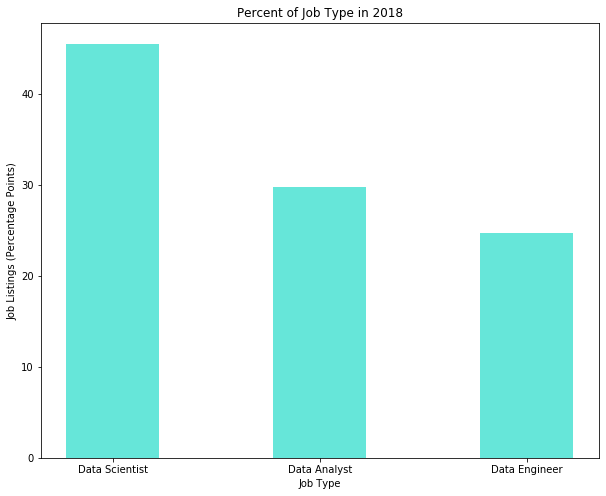

In [76]:
#Which is more in demand (data scientist, analyst, engineer?)
#What is the difference between them?

job_type=df_cleaned["Job_Type"].value_counts()
job_type_df=pd.DataFrame(job_type)

print(job_type_df)

sum_type=job_type_df.sum()

job_type_df=job_type_df/sum_type*100

listing=job_type_df["Job_Type"]
x_axis = [1,2,3]

plt.figure(figsize=(10,8))

width=0.45
plt.bar(x_axis, listing, width, color='turquoise', alpha=0.8, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Data Scientist", "Data Analyst", "Data Engineer"])


plt.title("Percent of Job Type in 2018")
plt.xlabel("Job Type")
plt.ylabel("Job Listings (Percentage Points)")
job_type_df.head()

,Job_Type
data_scientist,45.522524
data_analyst,29.728251
data_engineer,24.749225


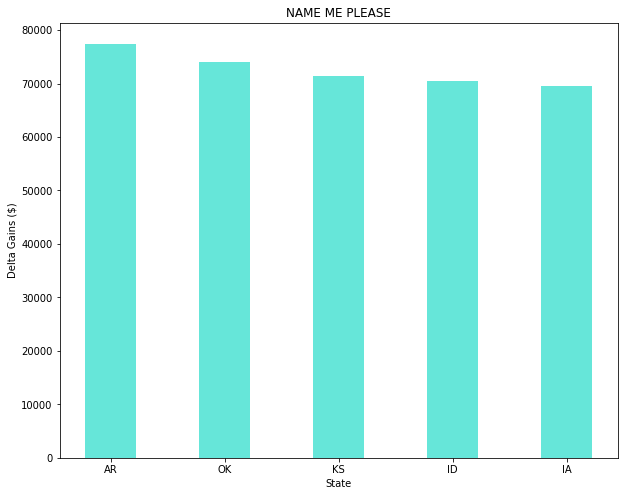

In [77]:
y_axis=top_5["Delta Gains"]
x_axis = [1,2,3,4,5]

plt.figure(figsize=(10,8))

width=0.45
plt.bar(x_axis, y_axis, width, color='turquoise', alpha=0.8, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["AR", "OK", "KS", "ID", "IA"])


plt.title("NAME ME PLEASE")
plt.xlabel("State")
plt.ylabel("Delta Gains ($)")
job_type_df.head()

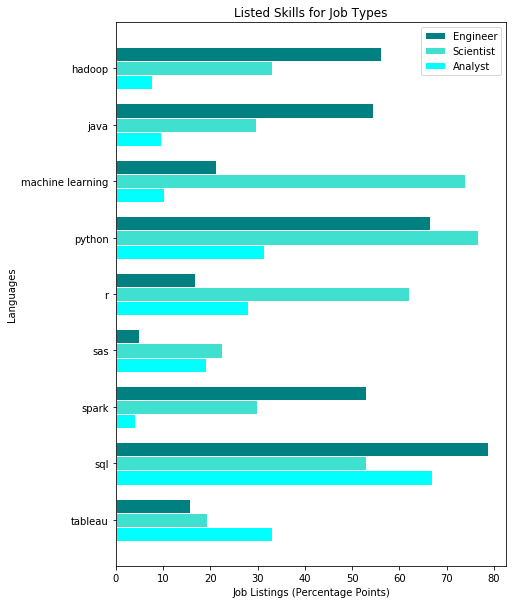

In [78]:
#Skills for each job type?
skill_set_type=df_cleaned.groupby("Job_Type")[["tableau","sql","spark","sas","r","python","machine learning","java","hadoop"]].sum()
skill_set_type.head()

#Credit: https://benalexkeen.com/bar-charts-in-matplotlib/
#Credit: https://stackoverflow.com/questions/42140474/typeerror-bar-got-multiple-values-for-keyword-argument-height
x=list(skill_set_type.columns.values)
data_analyst = skill_set_type.iloc[0,:]/1630*100
data_engineer = skill_set_type.iloc[1,:]/1357*100
data_scientist = skill_set_type.iloc[2,:]/2496*100

plt.figure(figsize=(7,10))
barWidth = 0.25

r1 = np.arange(len(data_analyst))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.barh(r3, data_engineer, color='teal',height=barWidth,edgecolor='white',label="Engineer")
plt.barh(r2, data_scientist, color='turquoise',height=barWidth,edgecolor='white',label="Scientist")
plt.barh(r1, data_analyst, color='cyan', height=barWidth,edgecolor='white',label="Analyst")


plt.ylabel("Languages")
plt.xlabel("Job Listings (Percentage Points)")
plt.title("Listed Skills for Job Types")
plt.legend()

plt.yticks(r2, x)

plt.show()

                No_of_Skills
Queried_Salary              
<80000              4.410480
80000-99999         6.473154
100000-119999       8.606618
120000-139999       9.767296
140000-159999       9.727378
>160000             8.007353
8.13386832026263


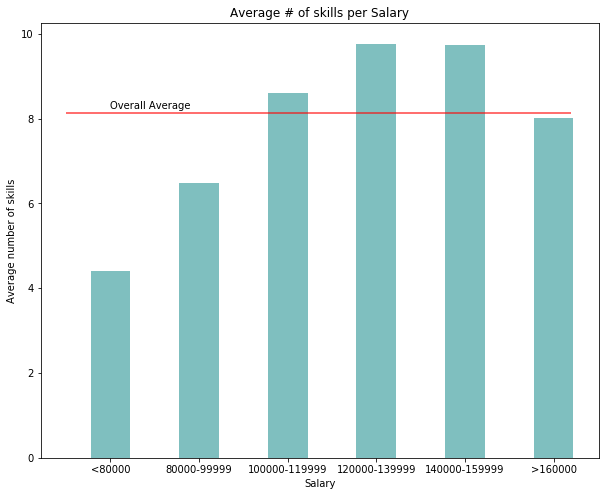

Total Average Skills = 8.13386832026263


,No_of_Skills
Queried_Salary,
<80000,4.410480
80000-99999,6.473154
100000-119999,8.606618
120000-139999,9.767296
140000-159999,9.727378


In [79]:
salary=df_cleaned.groupby("Queried_Salary")["No_of_Skills"].mean()
salary_df=pd.DataFrame(salary)
resalary_df=salary_df.reindex(index=["<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"])
print(resalary_df)

total_avg_skill=df_cleaned["No_of_Skills"].mean()
print(total_avg_skill)

plt.figure(figsize=(10,8))
x=[1,2,3,4,5,6]
y=resalary_df["No_of_Skills"]
xticks=["<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"]
width=0.45
plot1=plt.bar(x,y,width, color='teal', alpha=0.5, align="center")
plt.xticks(x,xticks)
plt.hlines(total_avg_skill,0.5,6.2,alpha=0.75, color="red")
plt.text(1, 8.3, "Overall Average", ha='left', va='center')
plt.title("Average # of skills per Salary")
plt.xlabel("Salary")
plt.ylabel("Average number of skills")
plt.show()


print(f"Total Average Skills = {total_avg_skill}")
resalary_df.head()

In [80]:
############ 

In [81]:
# Analysis Stats for Salary vs Job_Type

In [82]:
test=df_cleaned["Job_Title"].value_counts()
test.head(30)

Data Scientist                      701
Data Engineer                       383
Data Analyst                        378
Senior Data Scientist               205
Senior Data Engineer                134
Senior Data Analyst                  81
Big Data Engineer                    79
Principal Data Scientist             62
Lead Data Scientist                  48
Sr. Data Scientist                   45
Sr. Data Engineer                    39
Staff Data Scientist                 38
Senior Big Data Engineer             33
Marketing Data Analyst               27
Data Analyst II                      25
Big Data Engineer - AWS & Hadoop     25
Lead Data Engineer                   23
Data Scientist, Senior               23
Business Data Analyst                22
Sr Data Engineer                     21
Sr Data Scientist                    21
Sr. Data Analyst                     19
Data Scientist, Mid                  19
AWS Big Data Engineer                18
Associate Data Scientist             17


In [83]:
#stats summary for salary based on job Types 
average=df_cleaned.groupby(['Job_Type']).mean()['Salary_Index']
median=df_cleaned.groupby(['Job_Type']).median()['Salary_Index']
variance=df_cleaned.groupby(['Job_Type']).var()['Salary_Index']
standard_deviation=df_cleaned.groupby(['Job_Type']).std()['Salary_Index']
sem=df_cleaned.groupby(['Job_Type']).sem()['Salary_Index']

# Created a DF
stats_summary_salary=pd.DataFrame({"Mean Salary Index": average,
                           "Median Salary Index": median,
                           "Salary Index Variance":variance,
                           "Salary Index Std. Dev.":standard_deviation,
                           "Salary Index Std. Err.":sem
                          })

stats_summary_salary

,Mean Salary Index,Median Salary Index,Salary Index Variance,Salary Index Std. Dev.,Salary Index Std. Err.
Job_Type,,,,,
data_analyst,2.142945,2.0,1.687964,1.299217,0.032180
data_engineer,3.830508,4.0,1.291310,1.136358,0.030848
data_scientist,3.890224,4.0,1.371512,1.171116,0.023441


In [84]:
#calculate stats for all job types and add to DF

total_mean=df_cleaned['Salary_Index'].mean()
total_median=df_cleaned['Salary_Index'].median()
total_variance=df_cleaned['Salary_Index'].var()
total_std=df_cleaned['Salary_Index'].std()
total_sem=df_cleaned['Salary_Index'].sem()

# stats summary by job type 
stats_summary_salary.loc['All Job Types',:] = [total_mean, total_median, total_variance, total_std,total_sem]


stats_summary_salary.round(1)


,Mean Salary Index,Median Salary Index,Salary Index Variance,Salary Index Std. Dev.,Salary Index Std. Err.
Job_Type,,,,,
data_analyst,2.1,2.0,1.7,1.3,0.0
data_engineer,3.8,4.0,1.3,1.1,0.0
data_scientist,3.9,4.0,1.4,1.2,0.0
All Job Types,3.4,3.0,2.1,1.4,0.0


In [85]:
# Analysis Stats for Number of Skills vs Job_Type

In [86]:

#stats summary by # of skills for each job tytle
average=df_cleaned.groupby(['Job_Type']).mean()['No_of_Skills']
median=df_cleaned.groupby(['Job_Type']).median()['No_of_Skills']
variance=df_cleaned.groupby(['Job_Type']).var()['No_of_Skills']
standard_deviation=df_cleaned.groupby(['Job_Type']).std()['No_of_Skills']
sem=df_cleaned.groupby(['Job_Type']).sem()['No_of_Skills']
# max_skills=df_cleaned['No_of_Skills'].max()
# min_skills=df_cleaned['No_of_Skills'].min()

# Created a DF
stats_summary2=pd.DataFrame({"Mean Number of Skills ": average,
                             "Median Number of Skills": median,
                             "Number of Skills Variance":variance,
#                              "Max Number of Skills .":max_skills,
#                              "Min Number of Skills .":min_skills,
                             "Number of Skills Std. Dev.":standard_deviation,
                             "Number of Skills Std. Err.":sem})

#stats summary by # of skills for all jobs

skill_mean=df_cleaned['No_of_Skills'].mean()
skill_median=df_cleaned['No_of_Skills'].median()
min_skills=df_cleaned['No_of_Skills'].min()
max_skills=df_cleaned['No_of_Skills'].max()
skill_variance=df_cleaned['No_of_Skills'].var()
skill_std=df_cleaned['No_of_Skills'].std()
skill_sem=df_cleaned['No_of_Skills'].sem()

# stats summary by job type 
stats_summary2.loc['All Job Types',:] = [skill_mean, skill_median, skill_variance, skill_std,skill_sem]
stats_summary2.round(1)

,Mean Number of Skills,Median Number of Skills,Number of Skills Variance,Number of Skills Std. Dev.,Number of Skills Std. Err.
Job_Type,,,,,
data_analyst,4.9,4.0,9.8,3.1,0.1
data_engineer,11.0,10.0,26.2,5.1,0.1
data_scientist,8.7,8.0,21.4,4.6,0.1
All Job Types,8.1,7.0,24.3,4.9,0.1


In [87]:
# Job Vacancy by Industry

In [88]:
#create DF by industry type, salary, and job title 
industry_df=df_cleaned[['Job_Title',\
                       'Queried_Salary',\
                       'Consulting and Business Services',\
                       'Internet and Software',\
                       'Banks and Financial Services',\
                       'Health Care',\
                       'Insurance',\
                       'Other_industries']]
industry_df

# fill blanks in industry with other
d=df_cleaned['Company_Industry'].fillna("Other")
e=pd.DataFrame(d)
#count other
count_other=(len(e[e['Company_Industry']=='Other']))

#calculate total nums of industry for each job title
#consulting
consulting_tot=industry_df['Consulting and Business Services'].sum()

#internet & software
internet_tot=industry_df['Internet and Software'].sum()

#banks
banks_tot=industry_df['Banks and Financial Services'].sum()

#health
health_tot=industry_df['Health Care'].sum()

#insurance
insurance_tot=industry_df['Insurance'].sum()

#other industry + unidentified industry
other_tot=(industry_df['Other_industries'].sum())+ count_other

total_postings=industry_df['Consulting and Business Services'].count()
total_postings


5483

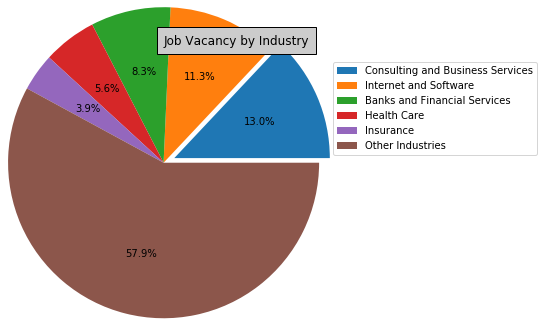

In [89]:
percentage_summary=pd.DataFrame({"Count of Consulting Industry": consulting_tot,
                           "Count of Internet Industry":internet_tot,
                           "Count of Banks":banks_tot,
                           "Count of Health":health_tot,
                           "Count of Insurance":insurance_tot,
                            "Count of Other":other_tot },index=[0])
# percentage_summary
data={'Industries':["Consulting and Business Services",\
                    "Internet and Software",\
                    "Banks and Financial Services",\
                    "Health Care",\
                    "Insurance",\
                    "Other Industries"],'Vacancy_count':[consulting_tot,internet_tot,banks_tot,health_tot,insurance_tot,other_tot]}
summary_df = pd.DataFrame(data)
summary_df['Vacancy_count'].astype(float)

subset=summary_df.set_index('Industries')
subset
# plot = summary_df.plot.pie(subplots=True, figsize=(11, 6))

# Pi Chart Plot
explode=(0.15, 0, 0.0, 0, 0,0)
tots=summary_df['Vacancy_count']
title = plt.title("Job Vacancy by Industry",bbox={'facecolor':'0.8', 'pad':7})
title.set_ha("left")
plt.gca().axis("equal")
pie = plt.pie(tots, startangle=0,autopct='%1.1f%%',radius=2,explode=explode)
labels=summary_df['Industries']
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.savefig('../04._Output/industrypie.png')

In [90]:
# Highest Paying Industry

In [91]:
#filter by highest pay 
high_pay_industry=industry_df[industry_df['Queried_Salary']== '>160000']
high_pay_industry

#calculate total nums of industry for each job title
#consulting
consulting=high_pay_industry['Consulting and Business Services'].sum()

#internet & software
internet=high_pay_industry['Internet and Software'].sum()

#banks
banks=high_pay_industry['Banks and Financial Services'].sum()

#health
health=high_pay_industry['Health Care'].sum()

#insurance
insurance=high_pay_industry['Insurance'].sum()

#other industry
other2=high_pay_industry['Other_industries'].sum()
other2

total_industry=consulting+internet+banks+health+insurance+other2
total_industry

254.0

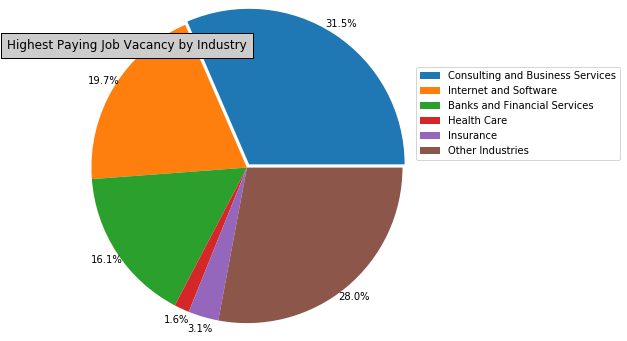

In [92]:
percentage_summary=pd.DataFrame({"Count of Consulting Industry": consulting_tot,
                           "Count of Internet Industry":internet_tot,
                           "Count of Banks":banks_tot,
                           "Count of Health":health_tot,
                           "Count of Insurance":insurance_tot,
                            "Count of Other":other_tot },index=[0])
# percentage_summary
data2={'Industries':["Consulting and Business Services",\
                    "Internet and Software",\
                    "Banks and Financial Services",\
                    "Health Care",\
                    "Insurance",\
                    "Other Industries"],'Totals':[consulting,internet,banks,health,insurance,other2]}
summary_df2 = pd.DataFrame(data2)
summary_df2

#Pie Chart Plot
explode=(0.05, 0, 0.0, 0, 0,0)
totals=summary_df2['Totals']
title = plt.title("Highest Paying Job Vacancy by Industry",bbox={'facecolor':'0.8', 'pad':6})
title.set_ha("right")
plt.gca().axis("equal")
pie = plt.pie(totals, startangle=0,autopct='%1.1f%%',pctdistance=1.08,radius=2,explode=explode)
labels=summary_df2['Industries']
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.savefig('../04._Output/highpayindustrypie1.png')



In [93]:
# Job Availability By Company

In [94]:
city_index2 = df_cleaned[ df_cleaned['Location'] == 'nan' ].index
df_cleaned.drop(city_index2, inplace=True)
df_cleaned.dropna(subset=['Location'], inplace=True)


C:\Users\Colin Ek\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Colin Ek\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
# Job vancancy/demand by state and company-Top 10

There are a total of 2058 job openings


<Figure size 864x720 with 0 Axes>

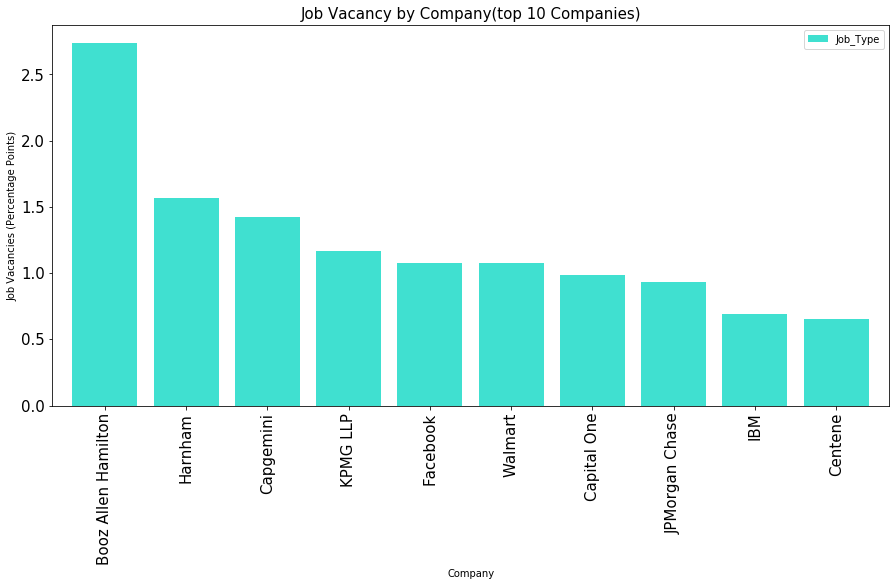

<Figure size 432x288 with 0 Axes>

In [96]:
# #find company with most job listings(top 10)
num_company=df_cleaned['Company'].nunique()
print(f'There are a total of {num_company} job openings')

most_job_openings= df_cleaned.groupby(['Company'])['Job_Type'].count()
ratio=most_job_openings/total_postings*100

top_company=pd.DataFrame(ratio.nlargest(10))
top_company

#plot
plt.figure(figsize=(12,10))
plot=top_company.plot(kind='bar', align="center",figsize = (15,7),width = 0.8,color='turquoise', fontsize=15)

plt.title("Job Vacancy by Company(top 10 Companies)",fontsize=15)
plt.ylabel('Job Vacancies (Percentage Points)')
plt.show()

plt.savefig('../04._Output/jobvacancybycompanybar.png',fontsize=15)

There are a total of 2058 job openings


<Figure size 864x720 with 0 Axes>

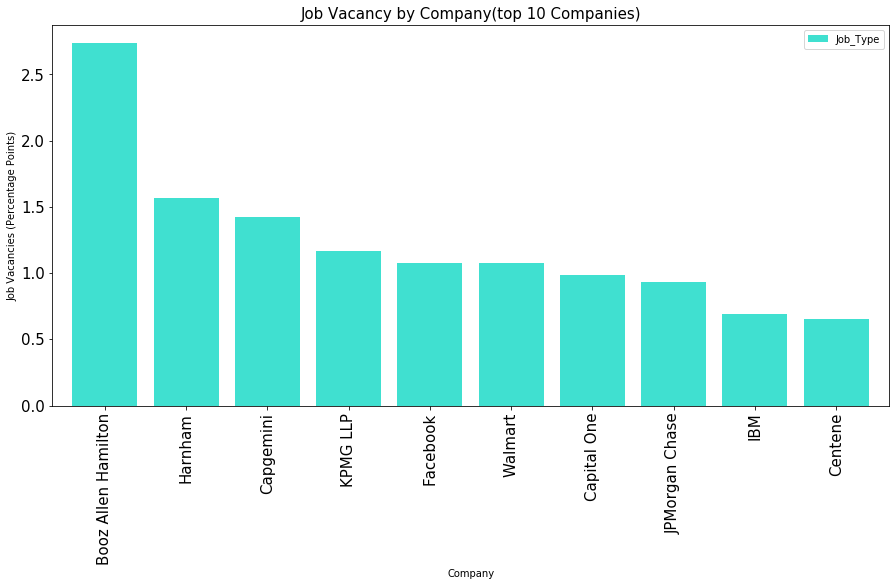

<Figure size 432x288 with 0 Axes>

In [97]:
# #find company with most job listings(top 10)
num_company=df_cleaned['Company'].nunique()
print(f'There are a total of {num_company} job openings')

most_job_openings= df_cleaned.groupby(['Company'])['Job_Type'].count()
ratio=most_job_openings/total_postings*100

top_company=pd.DataFrame(ratio.nlargest(10))
top_company

#plot
plt.figure(figsize=(12,10))
plot=top_company.plot(kind='bar', align="center",figsize = (15,7),width = 0.8,color='turquoise', fontsize=15)

plt.title("Job Vacancy by Company(top 10 Companies)",fontsize=15)
plt.ylabel('Job Vacancies (Percentage Points)')
plt.show()

plt.savefig('../04._Output/jobvacancybycompanybar.png',fontsize=15)

In [98]:
# Jobs By State

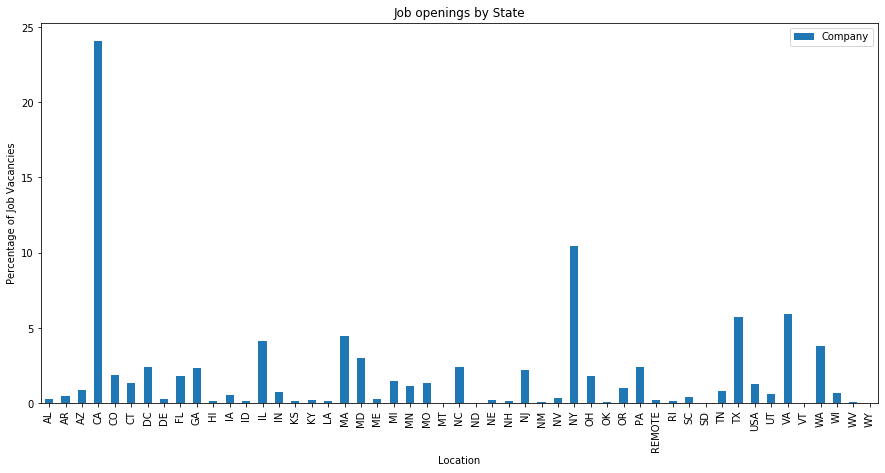

<Figure size 432x288 with 0 Axes>

In [99]:
#all states
job_count_city=df_cleaned.groupby(['Location'])['Company'].count()
ratio2=job_count_city/total_postings*100
state_df=pd.DataFrame(ratio2)

#plot bar
plot=state_df.plot(kind='bar', align="center",figsize = (15,7))
plt.title('Job openings by State')
plt.ylabel('Percentage of Job Vacancies')
plt.show()
plt.savefig('../04._Output/job_vacancy_by_allstates.png')


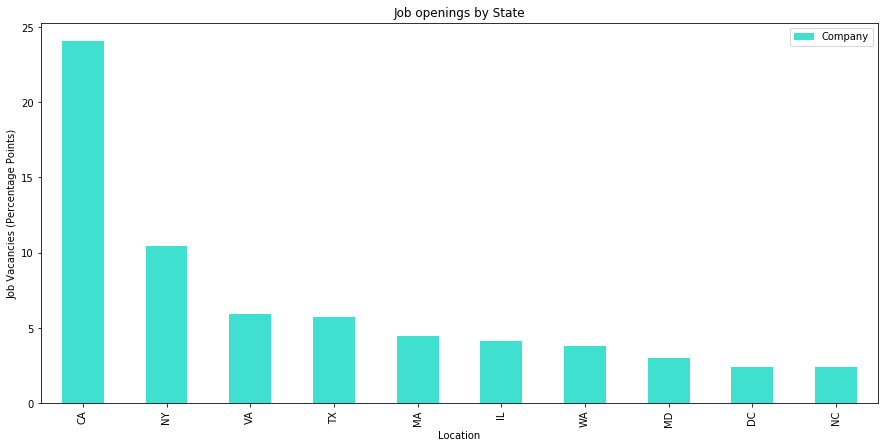

<Figure size 432x288 with 0 Axes>

In [100]:
#top 10 states
state_df2=pd.DataFrame(ratio2.nlargest(10))

##plot bar
plot=state_df2.plot(kind='bar', align="center",color='turquoise',figsize = (15,7))
plt.title('Job openings by State')
plt.ylabel('Job Vacancies (Percentage Points)')
plt.show()
plt.savefig('../04._Output/job_vacancy_by_topstates.png')

In [101]:
# Map Where The Jobs are 

In [102]:
# Jobs By Industry

industry_df=pd.DataFrame(df_cleaned.loc[:,['Location',\
                                    'Consulting and Business Services',\
                                    'Internet and Software',\
                                    'Banks and Financial Services',\
                                    'Health Care',\
                                   'Insurance',\
                                    'Company']])
industry_df.dropna()

industry_df
map_industry=industry_df.groupby(['Location'])['Company'].count()

map_df=pd.DataFrame(map_industry)
grouped_map=map_df.reset_index()

grouped_map.head()

,Location,Company
0,AL,16
1,AR,27
2,AZ,48
3,CA,1321
4,CO,104


In [103]:
#create df by state with lat and lng columns
grouped_map["Lat"] = ""
grouped_map["Lng"] = ""
grouped_map.groupby(['Location'])

#drop remote cities and USA


state_bylocation=pd.DataFrame(grouped_map)
#state_bylocation.dtypes

params = {"key": gkey}
# max_rows=200
# Loop through the location and run a lat/long search for each city
for index, row in state_bylocation.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    state = row['Location']
    

    # update address key value
    params['address'] = f"{state}"

#     # make request
    state_lat_lng = requests.get(base_url, params=params)

#     # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
#     print(state_lat_lng.url)
    
# #     # convert to json
    state_lat_lng = state_lat_lng.json()
#     print(state_lat_lng['results'][0]['geometry']['location'])
#     time.sleep(1.00)

    state_bylocation.loc[index, "Lat"] = state_lat_lng["results"][0]['geometry']["location"]["lat"]
    state_bylocation.loc[index,'Lng']= state_lat_lng["results"][0]['geometry']["location"]["lng"]
#     if index >max_rows and max_rows>0:
#         break

#change lat and lng to float 
state_bylocation[["Lat","Lng"]].astype(float)
# summary_df['Vacancy_count'].astype(float)
state_bylocation.head()

locations=state_bylocation[['Lat','Lng']]
fig = gmaps.figure(map_type="TERRAIN")

heat_layer = gmaps.heatmap_layer(locations, weights=state_bylocation['Company'], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer)
## State Label Marker
# state_template="""<dl><dd>{Location}</dd></dl>"""
# state_info=[state_template.format(**row) for index,row in state_bylocation.iterrows()]
# marker_layer=gmaps.marker_layer(locations,info_box_content= state_info)
# fig.add_layer(marker_layer)

plt.savefig('../04._Output/company_concentrationmap.png')
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [104]:
# Highest Pay by State  ( >160000)

In [105]:
salary_df=pd.DataFrame(df_cleaned.loc[:,['Location',\
                                    'Salary_Index']])

salary_df.dropna()

salary_df.head()

,Location,Salary_Index
0,MO,1.0
1,TX,1.0
2,OR,1.0
3,DC,1.0
4,TX,1.0


In [106]:
#highest pay only
high_pay_salary=salary_df[salary_df['Salary_Index']== 6]
high_pay_salary.head()

,Location,Salary_Index
2312,OR,6.0
2313,NY,6.0
2314,CA,6.0
2315,CA,6.0
2316,NY,6.0


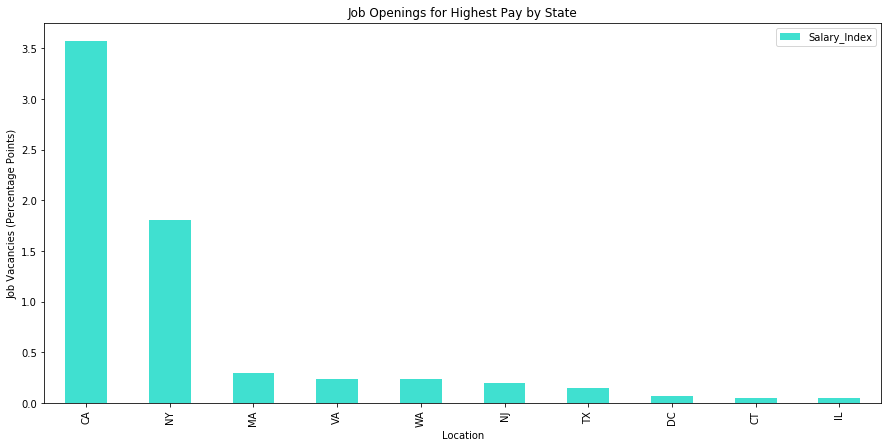

<Figure size 432x288 with 0 Axes>

In [107]:
#all states
highpay_jobs_state=high_pay_salary.groupby(['Location'])['Salary_Index'].count()
ratio3=highpay_jobs_state/total_postings*100
state_df3=pd.DataFrame(ratio3.nlargest(10))



#plot bar
plot=state_df3.plot(kind='bar', align="center",figsize = (15,7),color='turquoise')
plt.title('Job Openings for Highest Pay by State')
plt.ylabel('Job Vacancies (Percentage Points)')
plt.show()
plt.savefig('../04._Output/job_vacancy_highpay_allstates.png')

In [108]:
#salary index count by state
pay_count= high_pay_salary.groupby(['Location'])['Salary_Index'].count()
pay_df=pd.DataFrame(pay_count)
pay_df.head()

,Salary_Index
Location,
CA,196
CO,2
CT,3
DC,4
DE,2


In [109]:
#add columns for lat and lng
pay_df["Lat"] = ""
pay_df["Lng"] = ""
pay_df.groupby(['Location'])
pay_bylocation=pd.DataFrame(pay_df)

pay_bylocation.reset_index(inplace=True)
pay_bylocation.head()


,Location,Salary_Index,Lat,Lng
0,CA,196,,
1,CO,2,,
2,CT,3,,
3,DC,4,,
4,DE,2,,


In [110]:
params = {"key": gkey}
# Loop through the location and run a lat/long search for each city
for index, row in pay_bylocation.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    states = row['Location']
    

    # update address key value
    params['address'] = f"{states}"

#     # make request
    states_lat_lng = requests.get(base_url, params=params)

#     # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
#     print(state_lat_lng.url)
    
# #     # convert to json
    states_lat_lng = states_lat_lng.json()
#     print(state_lat_lng['results'][0]['geometry']['location'])
#     time.sleep(1.00)

    pay_bylocation.loc[index, "Lat"] = states_lat_lng["results"][0]['geometry']["location"]["lat"]
    pay_bylocation.loc[index,'Lng']= states_lat_lng["results"][0]['geometry']["location"]["lng"]
#     if index >max_rows and max_rows>0:
#         break
pay_bylocation.head()

,Location,Salary_Index,Lat,Lng
0,CA,196,36.7783,-119.418
1,CO,2,37.0366,-95.6714
2,CT,3,41.6032,-73.0877
3,DC,4,38.906,-77.0334
4,DE,2,37.0902,-95.7129


In [111]:
location=pay_bylocation[['Lat','Lng']]
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(location, weights=pay_bylocation['Salary_Index'], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 2)
fig.add_layer(heat_layer)
state_template="""<dl><dd>{Location}</dd></dl>"""
pay_info=[state_template.format(**row) for index,row in pay_df.iterrows()]
# print(state_info)
marker_layer=gmaps.marker_layer(location,info_box_content= pay_info)
fig.add_layer(marker_layer)
fig
plt.savefig('../04._Output/high_pay_concentration_map.png')
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [112]:
#################

In [113]:
#create a dataframe to hold the above results
new_df = df_cleaned[["Job_Title", "Job_Type", "Queried_Salary", "Salary_Index", "No_of_Skills", "Skill", "Company_Industry", "Location"]]
new_df.head()
salaryIndex_sort=new_df.sort_values(["Salary_Index"],ascending = True)
salaryIndex_sort.head()


,Job_Title,Job_Type,Queried_Salary,Salary_Index,No_of_Skills,Skill,Company_Industry,Location
0,Data Scientist,data_scientist,<80000,1.0,2.0,"['SAP', 'SQL']",Health Care,MO
2802,IMPACT DATA ANALYST,data_analyst,<80000,1.0,6.0,"['Power BI', 'SAS', 'Tableau', 'Predictive Ana...",NaN,GA
2801,Aircraft Data Analyst,data_analyst,<80000,1.0,7.0,"['JavaScript', 'Confluence', 'Time Management'...",NaN,TX
2800,Data Analyst,data_analyst,<80000,1.0,3.0,"['Python', 'SQL', 'AWS']",NaN,TX
2799,Data Analyst,data_analyst,<80000,1.0,2.0,"['Data Warehouse', 'SQL']",Auto,OH


In [114]:
job_df = salaryIndex_sort.groupby(by=['Queried_Salary'],as_index=False)['No_of_Skills'].count()
job_df

#calculate total number of job type
job_df = new_df['Job_Title'].value_counts()
#length of the count of each unique school name
#skill_df_n = len(skill_df)
print(job_df)

avg_job=salaryIndex_sort.groupby(['Job_Type']).mean()
avg_job
rename_Nskill = avg_job.rename(columns={"No_of_Skills": "Avg_No_Skills"})
rename_Nskill

avg_skills=salaryIndex_sort.groupby(["Queried_Salary"]).mean()
avg_skills

#avg skills per salary range
skill_salary_grouped=new_df.groupby(["Salary_Index"]).mean()
skill_salary_grouped
skill_salary = skill_salary_grouped["No_of_Skills"].mean()
skill_salary

Data Scientist                                                       701
Data Analyst                                                         378
Data Engineer                                                        290
Senior Data Scientist                                                205
Senior Data Engineer                                                 109
                                                                    ... 
EBI Data Analyst                                                       1
Lead Data Engineer â€“ Demand Sensing, Enterprise Data & Analy...      1
Senior Data Scientist, Andi                                            1
Lead Data Scientist, Marketing                                         1
Hadoop Data Engineer                                                   1
Name: Job_Title, Length: 2160, dtype: int64


7.760042592607771

In [115]:
# skill_salary=skill_salary.sort_values()
# skill_salary
# # Generate a bar plot showing the queried salary and the average number of skills. 
# skills_bar=skill_salary.plot(kind="bar", color="b", title="Total Number of skills")

# skills_bar.xaxis.grid(True) # adding vertical grid lines
# skills_bar.set_xlabel("Salary")
# skills_bar.set_ylabel("No_of-Skills")
# orientation=plt.xticks(rotation=45)#rotation of the labels
# skills_bar.set_xticklabels(("<$80k","$80k-$99.9k$","$100k-$119.9k$","$120k-$139.9k$", "$140k-$159.9k$",">$160k")) 


# plt.show()
# plt.tight_layout()



In [116]:
############ 

In [117]:
# # Select Columns to keep in df copy
df_cleaned.dtypes
df1 = df_cleaned.drop(columns="Link")
# df1 = df1.drop(columns="Description")
df1 = df1.drop(columns="Index_No")
# df1

df_sal = df1.groupby('Salary_Index')['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others'].mean().reset_index()


df_sal = pd.DataFrame(df_sal)
df_sal

# df_sal = df_sal.rename(columns={'python mean': 'a'})
# df_sal
df_sal= df_sal.set_index(['Salary_Index'])
df_sal

Salary_List = ['<80000', '80000-99999', '100000-119999', '120000-139999', '140000-159999', '>160000']
df_sal['Salary_List'] = Salary_List
df_sal
df_sal = df_sal.set_index(['Salary_List'])
df_sal 

df_sal = df_sal.rename(columns = {'python':'Python', 'sql':'SQL','machine learning': 'Machine Learning', \
                                  'r': 'R', 'hadoop': 'Hadoop', 'tableau': 'Tableau', \
                                  'sas':'SAS', 'spark':'Spark', 'java':'Java'})


df_sal=df_sal.style.format("{:.2%}")
df_sal

# df_sal.columns




C:\Users\Colin Ek\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Python,SQL,Machine Learning,R,Hadoop,Tableau,SAS,Spark,Java,Others
Salary_List,,,,,,,,,,
<80000,20.73%,56.35%,9.78%,21.46%,1.75%,23.65%,19.12%,1.31%,8.03%,89.49%
80000-99999,45.56%,73.13%,22.61%,35.18%,10.96%,32.18%,17.99%,7.61%,14.19%,93.31%
100000-119999,63.71%,66.49%,43.53%,48.92%,29.66%,26.81%,22.03%,25.42%,29.74%,94.92%
120000-139999,75.17%,64.32%,57.03%,50.17%,45.42%,20.93%,15.85%,40.34%,37.88%,96.53%
140000-159999,78.40%,53.74%,63.19%,45.64%,48.47%,16.20%,15.21%,44.91%,43.07%,94.23%
>160000,67.01%,50.00%,57.61%,37.82%,43.15%,10.66%,13.20%,40.36%,34.77%,88.83%


In [118]:
# Make DataFrame with just Salary_Index of 6, top income bracket
df1_6 = df1[df1['Salary_Index']==6]
len(df1_6['Salary_Index'])
# df1_6

394

In [119]:
# df_ind = df1_6.loc[:,['Queried_Salary', 'Company_Industry']]
# df_ind 

# df_ind = df_ind.replace('', np.NaN)
# df_ind

# df_ind=df_ind.replace({'Insurance' : 'Other'})
# df_ind=df_ind.replace({'Health Care' : 'Other'})
# df_ind=df_ind.replace({'Media, News and Publishing' : 'Other'})
# df_ind=df_ind.replace({'Telecommunications' : 'Other'})
# df_ind=df_ind.replace({'Industrial Manufacturing' : 'Other'})
# df_ind=df_ind.replace({'Pharmaceuticals' : 'Other'})
# df_ind=df_ind.replace({'Retail' : 'Other'})
# df_ind=df_ind.replace({'Aerospace and Defense' : 'Other'})
# df_ind=df_ind.replace({'Auto' : 'Other'})
# df_ind=df_ind.replace({'Consumer Goods and Services' : 'Other'})
# df_ind=df_ind.replace({'Real Estate' : 'Other'})
# df_ind=df_ind.replace({'Construction' : 'Other'})
# df_ind=df_ind.replace({'Energy and Utilities' : 'Other'})
# df_ind=df_ind.replace({'Restaurants, Travel and LeisureConsulting and Business Services' : 'Other'})
# df_ind=df_ind.replace({'Transport and Freight' : 'Other'})
# # df_ind

# df_ind = df_ind['Company_Industry'].value_counts()
# df_ind
# df_ind_sum = pd.DataFrame ({"Industry": df_ind})
# df_ind_sum

# df_ind.plot(kind = 'pie', autopct = '%1.1f%%')

In [120]:
# Top skills by industry
df1['Company_Industry'].value_counts()
# Top five industries are: 
# Consulting and Business Services                                   712
# Internet and Software                                              620
# Banks and Financial Services                                       455
# Health Care                                                        306
# Insurance                                                          214

df_ind2 = df1.loc[:,['Queried_Salary', 'Company_Industry']]
len(df_ind2 )

df_ind2 = df_ind2.replace('', np.NaN)
len(df_ind2)
sum(df_ind2['Company_Industry'].value_counts())
# 3,675 + 1,809 blanks = 5,484 total

# # df_ind2=df_ind2.replace({'Health Care' : 'Other'})
# # df_ind2=df_ind2.replace({'Insurance' : 'Other'})

df_ind2=df_ind2.replace({'Industrial Manufacturing' : 'Other'})
df_ind2=df_ind2.replace({'Aerospace and Defense' : 'Other'})
df_ind2=df_ind2.replace({'Retail' : 'Other'})
df_ind2=df_ind2.replace({'Education and Schools' : 'Other'})
df_ind2=df_ind2.replace({'Computers and Electronics' : 'Other'})
df_ind2=df_ind2.replace({'Consumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Media, News and Publishing' : 'Other'})
df_ind2=df_ind2.replace({'Human Resources and Staffing' : 'Other'})
df_ind2=df_ind2.replace({'Telecommunications' : 'Other'})
df_ind2=df_ind2.replace({'Government' : 'Other'})
df_ind2=df_ind2.replace({'Pharmaceuticals' : 'Other'})
df_ind2=df_ind2.replace({'Energy and Utilities' : 'Other'})
df_ind2=df_ind2.replace({'Restaurants, Travel and Leisure' : 'Other'})
df_ind2=df_ind2.replace({'Restaurants, Travel and LeisureConsulting and Business Services' : 'Other'})
df_ind2=df_ind2.replace({'Auto' : 'Other'})
df_ind2=df_ind2.replace({'Transport and Freight' : 'Other'})
df_ind2=df_ind2.replace({'InsuranceHealth Care' : 'Other'})
df_ind2=df_ind2.replace({'Real Estate' : 'Other'})
df_ind2=df_ind2.replace({'Organization' : 'Other'})
df_ind2=df_ind2.replace({'Agriculture and Extraction' : 'Other'})
df_ind2=df_ind2.replace({'Food and Beverages' : 'Other'})
df_ind2=df_ind2.replace({'Construction' : 'Other'})
df_ind2=df_ind2.replace({'RetailConsumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Real EstateReal Estate' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingConsumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingConstruction' : 'Other'})
df_ind2=df_ind2.replace({'Food and BeveragesConsulting and Business Services' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingAgriculture and Extraction' : 'Other'})
# sum(df_ind2['Company_Industry'].value_counts())
# 3,675 is count, none lost in process
df_ind2 = df_ind2['Company_Industry'].value_counts()
df_ind2
df_ind2_sum = pd.DataFrame ({"Industry": df_ind2})
df_ind2_sum



,Industry
Other,1366
Consulting and Business Services,708
Internet and Software,620
Banks and Financial Services,455
Health Care,304
Insurance,214


In [121]:
# Make Dataset for just Industry = Consulting and Business Services
df1_CBS = df1[df1['Company_Industry']=='Consulting and Business Services']
df1_CBS
CBS_sum_Total = len(df1_CBS)

CBS_sum_Py = sum(df1_CBS['python'])
CBS_sum_Py
CBS_sum_SQL = sum(df1_CBS['sql'])
CBS_sum_ML = sum(df1_CBS['machine learning'])
CBS_sum_R = sum(df1_CBS['r'])
CBS_sum_Had = sum(df1_CBS['hadoop'])
CBS_sum_Tab = sum(df1_CBS['tableau'])
CBS_sum_SAS = sum(df1_CBS['sas'])
CBS_sum_Spark = sum(df1_CBS['spark'])
CBS_sum_Java = sum(df1_CBS['java'])
CBS_sum_Others = sum(df1_CBS['Others'])

# Make Dataset for just Industry = Internet and Software
df1_IS = df1[df1['Company_Industry']=='Internet and Software']
df1_IS
IS_sum_Total = len(df1_IS)

IS_sum_Py = sum(df1_IS['python'])
IS_sum_Py
IS_sum_SQL = sum(df1_IS['sql'])
IS_sum_ML = sum(df1_IS['machine learning'])
IS_sum_R = sum(df1_IS['r'])
IS_sum_Had = sum(df1_IS['hadoop'])
IS_sum_Tab = sum(df1_IS['tableau'])
IS_sum_SAS = sum(df1_IS['sas'])
IS_sum_Spark = sum(df1_IS['spark'])
IS_sum_Java = sum(df1_IS['java'])
IS_sum_Others = sum(df1_IS['Others'])

# Make Dataset for just Industry = Banks and Financial Services
df1_BFS = df1[df1['Company_Industry']=='Banks and Financial Services']
df1_BFS
BFS_sum_Total = len(df1_BFS)

BFS_sum_Py = sum(df1_BFS['python'])
BFS_sum_Py
BFS_sum_SQL = sum(df1_BFS['sql'])
BFS_sum_ML = sum(df1_BFS['machine learning'])
BFS_sum_R = sum(df1_BFS['r'])
BFS_sum_Had = sum(df1_BFS['hadoop'])
BFS_sum_Tab = sum(df1_BFS['tableau'])
BFS_sum_SAS = sum(df1_BFS['sas'])
BFS_sum_Spark = sum(df1_BFS['spark'])
BFS_sum_Java = sum(df1_BFS['java'])
BFS_sum_Others = sum(df1_BFS['Others'])

# # Make Dataset for just Industry = Health Care
# df1_HC = df1[df1['Company_Industry']== 'Health Care']
# df1_HC
# HC_sum_Total = len(df1_HC)

# HC_sum_Py = sum(df1_HC['python'])
# HC_sum_Py
# HC_sum_SQL = sum(df1_HC['sql'])
# HC_sum_ML = sum(df1_HC['machine learning'])
# HC_sum_R = sum(df1_HC['r'])
# HC_sum_Had = sum(df1_HC['hadoop'])
# HC_sum_Tab = sum(df1_HC['tableau'])
# HC_sum_SAS = sum(df1_HC['sas'])
# HC_sum_Spark = sum(df1_HC['spark'])
# HC_sum_Java = sum(df1_HC['java'])
# HC_sum_Others = sum(df1_HC['Others'])

# # Make Dataset for just Industry = Insurance
# df1_I = df1[df1['Company_Industry']== 'Insurance']
# df1_I
# I_sum_Total = len(df1_I)

# I_sum_Py = sum(df1_I['python'])
# I_sum_Py
# I_sum_SQL = sum(df1_I['sql'])
# I_sum_ML = sum(df1_I['machine learning'])
# I_sum_R = sum(df1_I['r'])
# I_sum_Had = sum(df1_I['hadoop'])
# I_sum_Tab = sum(df1_I['tableau'])
# I_sum_SAS = sum(df1_I['sas'])
# I_sum_Spark = sum(df1_I['spark'])
# I_sum_Java = sum(df1_I['java'])
# I_sum_Others = sum(df1_I['Others'])

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others', 'Total']
CBS = [CBS_sum_Py, CBS_sum_SQL, CBS_sum_ML, CBS_sum_R, CBS_sum_Had, CBS_sum_Tab, CBS_sum_SAS, CBS_sum_Spark, CBS_sum_Java, CBS_sum_Others, CBS_sum_Total]
IS = [IS_sum_Py, IS_sum_SQL, IS_sum_ML, IS_sum_R, IS_sum_Had, IS_sum_Tab, IS_sum_SAS, IS_sum_Spark, IS_sum_Java, IS_sum_Others, IS_sum_Total]
BFS = [BFS_sum_Py, BFS_sum_SQL, BFS_sum_ML, BFS_sum_R, BFS_sum_Had, BFS_sum_Tab, BFS_sum_SAS, BFS_sum_Spark, BFS_sum_Java, BFS_sum_Others, BFS_sum_Total]
# HC = [HC_sum_Py, HC_sum_SQL, HC_sum_ML, HC_sum_R, HC_sum_Had, HC_sum_Tab, HC_sum_SAS, HC_sum_Spark, HC_sum_Java, HC_sum_Others, HC_sum_Total]
# I = [I_sum_Py, I_sum_SQL, I_sum_ML, I_sum_R, I_sum_Had, I_sum_Tab, I_sum_SAS, I_sum_Spark, I_sum_Java, I_sum_Others, I_sum_Total]

industry_sum = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS})
industry_sum

,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services
0,python,424.0,432.0,264.0
1,sql,374.0,411.0,310.0
2,machine learning,340.0,291.0,187.0
3,r,275.0,266.0,171.0
4,hadoop,270.0,242.0,165.0
5,tableau,199.0,105.0,105.0
6,sas,121.0,82.0,96.0
7,spark,234.0,212.0,160.0
8,java,182.0,215.0,163.0
9,Others,654.0,583.0,436.0


In [122]:
# Make Dataset for just Industry = Consulting and Business Services
df1_CBS = df1[df1['Company_Industry']=='Consulting and Business Services']
df1_CBS
CBS_sum_Total = len(df1_CBS)

CBS_sum_Py_p = sum(df1_CBS['python'])/CBS_sum_Total
CBS_sum_Py_p
CBS_sum_SQL_p = sum(df1_CBS['sql'])/CBS_sum_Total
CBS_sum_ML_p = sum(df1_CBS['machine learning'])/CBS_sum_Total
CBS_sum_R_p = sum(df1_CBS['r'])/CBS_sum_Total
CBS_sum_Had_p = sum(df1_CBS['hadoop'])/CBS_sum_Total
CBS_sum_Tab_p = sum(df1_CBS['tableau'])/CBS_sum_Total
CBS_sum_SAS_p = sum(df1_CBS['sas'])/CBS_sum_Total
CBS_sum_Spark_p = sum(df1_CBS['spark'])/CBS_sum_Total
CBS_sum_Java_p = sum(df1_CBS['java'])/CBS_sum_Total
CBS_sum_Others_p = sum(df1_CBS['Others'])/CBS_sum_Total

# Make Dataset for just Industry = Internet and Software
df1_IS = df1[df1['Company_Industry']=='Internet and Software']
df1_IS
IS_sum_Total = len(df1_IS)

IS_sum_Py_p = sum(df1_IS['python'])/IS_sum_Total
IS_sum_Py_p
IS_sum_SQL_p = sum(df1_IS['sql'])/IS_sum_Total
IS_sum_ML_p = sum(df1_IS['machine learning'])/IS_sum_Total
IS_sum_R_p = sum(df1_IS['r'])/IS_sum_Total
IS_sum_Had_p = sum(df1_IS['hadoop'])/IS_sum_Total
IS_sum_Tab_p = sum(df1_IS['tableau'])/IS_sum_Total
IS_sum_SAS_p = sum(df1_IS['sas'])/IS_sum_Total
IS_sum_Spark_p = sum(df1_IS['spark'])/IS_sum_Total
IS_sum_Java_p = sum(df1_IS['java'])/IS_sum_Total
IS_sum_Others_p = sum(df1_IS['Others'])/IS_sum_Total

# Make Dataset for just Industry = Banks and Financial Services
df1_BFS = df1[df1['Company_Industry']=='Banks and Financial Services']
df1_BFS
BFS_sum_Total = len(df1_BFS)

BFS_sum_Py_p = sum(df1_BFS['python'])/BFS_sum_Total
BFS_sum_Py_p
BFS_sum_SQL_p = sum(df1_BFS['sql'])/BFS_sum_Total
BFS_sum_ML_p = sum(df1_BFS['machine learning'])/BFS_sum_Total
BFS_sum_R_p = sum(df1_BFS['r'])/BFS_sum_Total
BFS_sum_Had_p = sum(df1_BFS['hadoop'])/BFS_sum_Total
BFS_sum_Tab_p = sum(df1_BFS['tableau'])/BFS_sum_Total
BFS_sum_SAS_p = sum(df1_BFS['sas'])/BFS_sum_Total
BFS_sum_Spark_p = sum(df1_BFS['spark'])/BFS_sum_Total
BFS_sum_Java_p = sum(df1_BFS['java'])/BFS_sum_Total
BFS_sum_Others_p = sum(df1_BFS['Others'])/BFS_sum_Total

# # Make Dataset for just Industry = Health Care
# df1_HC = df1[df1['Company_Industry']== 'Health Care']
# df1_HC
# HC_sum_Total = len(df1_HC)

# HC_sum_Py_p = sum(df1_HC['python'])/HC_sum_Total
# HC_sum_Py_p
# HC_sum_SQL_p = sum(df1_HC['sql'])/HC_sum_Total
# HC_sum_ML_p = sum(df1_HC['machine learning'])/HC_sum_Total
# HC_sum_R_p = sum(df1_HC['r'])/HC_sum_Total
# HC_sum_Had_p = sum(df1_HC['hadoop'])/HC_sum_Total
# HC_sum_Tab_p = sum(df1_HC['tableau'])/HC_sum_Total
# HC_sum_SAS_p = sum(df1_HC['sas'])/HC_sum_Total
# HC_sum_Spark_p = sum(df1_HC['spark'])/HC_sum_Total
# HC_sum_Java_p = sum(df1_HC['java'])/HC_sum_Total
# HC_sum_Others_p = sum(df1_HC['Others'])/HC_sum_Total

# # Make Dataset for just Industry = Insurance
# df1_I = df1[df1['Company_Industry']== 'Insurance']
# df1_I
# I_sum_Total = len(df1_I)

# I_sum_Py_p = sum(df1_I['python'])/I_sum_Total
# I_sum_Py_p
# I_sum_SQL_p = sum(df1_I['sql'])/I_sum_Total
# I_sum_ML_p = sum(df1_I['machine learning'])/I_sum_Total
# I_sum_R_p = sum(df1_I['r'])/I_sum_Total
# I_sum_Had_p = sum(df1_I['hadoop'])/I_sum_Total
# I_sum_Tab_p = sum(df1_I['tableau'])/I_sum_Total
# I_sum_SAS_p = sum(df1_I['sas'])/I_sum_Total
# I_sum_Spark_p = sum(df1_I['spark'])/I_sum_Total
# I_sum_Java_p = sum(df1_I['java'])/I_sum_Total
# I_sum_Others_p = sum(df1_I['Others'])/I_sum_Total


############### Proportions, not Percentages. With Others and Total


Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others', 'Total']
CBS = ["{:.2%}".format(CBS_sum_Py_p), 
       "{:.2%}".format(CBS_sum_SQL_p), 
       "{:.2%}".format(CBS_sum_ML_p), 
       "{:.2%}".format(CBS_sum_R_p), 
       "{:.2%}".format(CBS_sum_Had_p), 
       "{:.2%}".format(CBS_sum_Tab_p), 
       "{:.2%}".format(CBS_sum_SAS_p), 
       "{:.2%}".format(CBS_sum_Spark_p), 
       "{:.2%}".format(CBS_sum_Java_p), 
       "{:.2%}".format(CBS_sum_Others_p), 
       CBS_sum_Total]
IS = ["{:.2%}".format(IS_sum_Py_p), 
      "{:.2%}".format(IS_sum_SQL_p), 
      "{:.2%}".format(IS_sum_ML_p), 
      "{:.2%}".format(IS_sum_R_p), 
      "{:.2%}".format(IS_sum_Had_p), 
      "{:.2%}".format(IS_sum_Tab_p), 
      "{:.2%}".format(IS_sum_SAS_p), 
      "{:.2%}".format(IS_sum_Spark_p), 
      "{:.2%}".format(IS_sum_Java_p), 
      "{:.2%}".format(IS_sum_Others_p), 
      IS_sum_Total]
BFS = ["{:.2%}".format(BFS_sum_Py_p), 
       "{:.2%}".format(BFS_sum_SQL_p), 
       "{:.2%}".format(BFS_sum_ML_p), 
       "{:.2%}".format(BFS_sum_R_p), 
       "{:.2%}".format(BFS_sum_Had_p), 
       "{:.2%}".format(BFS_sum_Tab_p), 
       "{:.2%}".format(BFS_sum_SAS_p), 
       "{:.2%}".format(BFS_sum_Spark_p), 
       "{:.2%}".format(BFS_sum_Java_p), 
       "{:.2%}".format(BFS_sum_Others_p), 
       BFS_sum_Total]
# HC = ["{:.2%}".format(HC_sum_Py_p), 
#       "{:.2%}".format(HC_sum_SQL_p), 
#       "{:.2%}".format(HC_sum_ML_p), 
#       "{:.2%}".format(HC_sum_R_p), 
#       "{:.2%}".format(HC_sum_Had_p), 
#       "{:.2%}".format(HC_sum_Tab_p), 
#       "{:.2%}".format(HC_sum_SAS_p), 
#       "{:.2%}".format(HC_sum_Spark_p), 
#       "{:.2%}".format(HC_sum_Java_p), 
#       "{:.2%}".format(HC_sum_Others_p), 
#       HC_sum_Total]
# I = ["{:.2%}".format(I_sum_Py_p),
#      "{:.2%}".format(I_sum_SQL_p),
#      "{:.2%}".format(I_sum_ML_p),
#      "{:.2%}".format(I_sum_R_p),
#      "{:.2%}".format(I_sum_Had_p),
#      "{:.2%}".format(I_sum_Tab_p),
#      "{:.2%}".format(I_sum_SAS_p),
#      "{:.2%}".format(I_sum_Spark_p),
#      "{:.2%}".format(I_sum_Java_p),
#      "{:.2%}".format(I_sum_Others_p),
#      I_sum_Total]

industry_sum_p = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS})
industry_sum_p

,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services
0,python,59.89%,69.68%,58.02%
1,sql,52.82%,66.29%,68.13%
2,machine learning,48.02%,46.94%,41.10%
3,r,38.84%,42.90%,37.58%
4,hadoop,38.14%,39.03%,36.26%
5,tableau,28.11%,16.94%,23.08%
6,sas,17.09%,13.23%,21.10%
7,spark,33.05%,34.19%,35.16%
8,java,25.71%,34.68%,35.82%
9,Others,92.37%,94.03%,95.82%


In [123]:
############### Proportions, not Percentages. With Others

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others']
CBS = [CBS_sum_Py_p, 
       CBS_sum_SQL_p, 
       CBS_sum_ML_p, 
       CBS_sum_R_p, 
       CBS_sum_Had_p, 
       CBS_sum_Tab_p, 
       CBS_sum_SAS_p, 
       CBS_sum_Spark_p, 
       CBS_sum_Java_p, 
       CBS_sum_Others_p]
IS = [IS_sum_Py_p, 
      IS_sum_SQL_p, 
      IS_sum_ML_p, 
      IS_sum_R_p, 
      IS_sum_Had_p, 
      IS_sum_Tab_p, 
      IS_sum_SAS_p, 
      IS_sum_Spark_p, 
      IS_sum_Java_p, 
      IS_sum_Others_p]
BFS = [BFS_sum_Py_p, 
       BFS_sum_SQL_p, 
       BFS_sum_ML_p, 
       BFS_sum_R_p, 
       BFS_sum_Had_p, 
       BFS_sum_Tab_p, 
       BFS_sum_SAS_p, 
       BFS_sum_Spark_p, 
       BFS_sum_Java_p, 
       BFS_sum_Others_p]
# HC = [HC_sum_Py_p, 
#       HC_sum_SQL_p, 
#       HC_sum_ML_p, 
#       HC_sum_R_p, 
#       HC_sum_Had_p, 
#       HC_sum_Tab_p, 
#       HC_sum_SAS_p, 
#       HC_sum_Spark_p, 
#       HC_sum_Java_p, 
#       HC_sum_Others_p]
# I = [I_sum_Py_p,
#      I_sum_SQL_p,
#      I_sum_ML_p,
#      I_sum_R_p,
#      I_sum_Had_p,
#      I_sum_Tab_p,
#      I_sum_SAS_p,
#      I_sum_Spark_p,
#      I_sum_Java_p,
#      I_sum_Others_p]

industry_sum_no_p = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS})
industry_sum_no_p



,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services
0,python,0.598870,0.696774,0.580220
1,sql,0.528249,0.662903,0.681319
2,machine learning,0.480226,0.469355,0.410989
3,r,0.388418,0.429032,0.375824
4,hadoop,0.381356,0.390323,0.362637
5,tableau,0.281073,0.169355,0.230769
6,sas,0.170904,0.132258,0.210989
7,spark,0.330508,0.341935,0.351648
8,java,0.257062,0.346774,0.358242
9,Others,0.923729,0.940323,0.958242


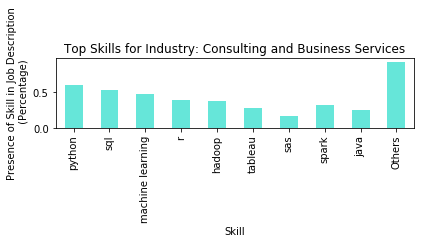

In [124]:
# CBS W/ Others
plt.clf()
CBSbar = industry_sum_no_p.loc[:, ['Skill', 'Consulting and Business Services']]
CBSbar = CBSbar.set_index(['Skill'])
CBSbar 

x_axis = CBSbar['Consulting and Business Services']
x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5, color='turquoise', alpha=0.8)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Consulting and Business Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")

# Save Plot
plt.savefig('../04._Output/CBSbar.png')
plt.tight_layout()
plt.show()

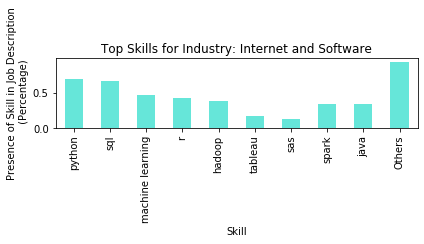

In [125]:
# IS W/ Others
plt.clf()
ISbar = industry_sum_no_p.loc[:, ['Skill', 'Internet and Software']]
ISbar = ISbar.set_index(['Skill'])
ISbar 

x_axis = ISbar['Internet and Software']
x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5, color='turquoise', alpha=0.8)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Internet and Software")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")

# Save Plot
plt.savefig('../04._Output/ISbar.png')
plt.tight_layout()
plt.show()

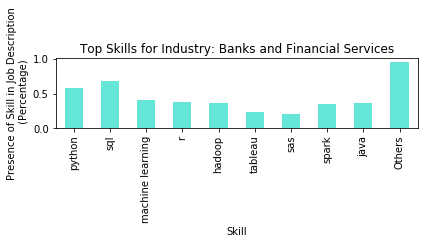

In [126]:
# BFS W/ Others
plt.clf()
BFSbar = industry_sum_no_p.loc[:, ['Skill', 'Banks and Financial Services']]
BFSbar = BFSbar.set_index(['Skill'])
BFSbar 

x_axis = BFSbar['Banks and Financial Services']
x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5, color='turquoise', alpha=0.8)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Banks and Financial Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


# Save Plot
plt.savefig('../04._Output/BFSbar.png')
plt.tight_layout()
plt.show()

In [127]:
# # HC W/ Others
# plt.clf()
# HCbar = industry_sum_no_p.loc[:, ['Skill', 'Health Care']]
# HCbar = HCbar.set_index(['Skill'])
# HCbar 

# x_axis = HCbar['Health Care']
# x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# # Set a title and labels for the chart
# plt.title("Top Skills for Industry: Health Care")
# plt.xlabel("Skill")
# plt.ylabel("Presence of Skill in Job Description\n (Percentage)")

# # Save Plot
# plt.savefig('../04._Output/HCbar.png')
# plt.tight_layout()
# plt.show()

# ########
# # I W/ Others
# plt.clf()
# Ibar = industry_sum_no_p.loc[:, ['Skill', 'Insurance']]
# Ibar = Ibar.set_index(['Skill'])
# Ibar 

# x_axis = Ibar['Insurance']
# x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# # Set a title and labels for the chart
# plt.title("Top Skills for Industry: Insurance")
# plt.xlabel("Skill")
# plt.ylabel("Presence of Skill in Job Description\n (Percentage)")

# # Save Plot
# plt.savefig('../04._Output/Ibar.png')
# plt.tight_layout()
# plt.show()

In [128]:
############### No Others
Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']
CBS = [CBS_sum_Py_p, 
       CBS_sum_SQL_p, 
       CBS_sum_ML_p, 
       CBS_sum_R_p, 
       CBS_sum_Had_p, 
       CBS_sum_Tab_p, 
       CBS_sum_SAS_p, 
       CBS_sum_Spark_p, 
       CBS_sum_Java_p]
IS = [IS_sum_Py_p, 
      IS_sum_SQL_p, 
      IS_sum_ML_p, 
      IS_sum_R_p, 
      IS_sum_Had_p, 
      IS_sum_Tab_p, 
      IS_sum_SAS_p, 
      IS_sum_Spark_p, 
      IS_sum_Java_p]
BFS = [BFS_sum_Py_p, 
       BFS_sum_SQL_p, 
       BFS_sum_ML_p, 
       BFS_sum_R_p, 
       BFS_sum_Had_p, 
       BFS_sum_Tab_p, 
       BFS_sum_SAS_p, 
       BFS_sum_Spark_p, 
       BFS_sum_Java_p]
# HC = [HC_sum_Py_p, 
#       HC_sum_SQL_p, 
#       HC_sum_ML_p, 
#       HC_sum_R_p, 
#       HC_sum_Had_p, 
#       HC_sum_Tab_p, 
#       HC_sum_SAS_p, 
#       HC_sum_Spark_p, 
#       HC_sum_Java_p]
# I = [I_sum_Py_p,
#      I_sum_SQL_p,
#      I_sum_ML_p,
#      I_sum_R_p,
#      I_sum_Had_p,
#      I_sum_Tab_p,
#      I_sum_SAS_p,
#      I_sum_Spark_p,
#      I_sum_Java_p]

industry_sum_no_p_no_o = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS})
industry_sum_no_p_no_o



,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services
0,python,0.598870,0.696774,0.580220
1,sql,0.528249,0.662903,0.681319
2,machine learning,0.480226,0.469355,0.410989
3,r,0.388418,0.429032,0.375824
4,hadoop,0.381356,0.390323,0.362637
5,tableau,0.281073,0.169355,0.230769
6,sas,0.170904,0.132258,0.210989
7,spark,0.330508,0.341935,0.351648
8,java,0.257062,0.346774,0.358242


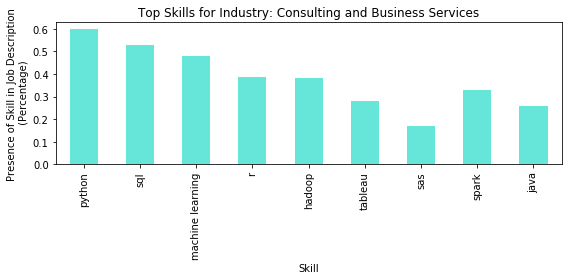

In [129]:
# CBS W/out Others
plt.clf()
CBSbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Consulting and Business Services']]
CBSbar = CBSbar.set_index(['Skill'])
CBSbar 

x_axis = CBSbar['Consulting and Business Services']
x_axis.plot(kind="bar",  figsize=(8,4), align="center", width=0.5, color='turquoise', alpha=0.8)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Consulting and Business Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")

# Save Plot
plt.savefig('../04._Output/CBSbar_no_others.png')
plt.tight_layout()
plt.show()

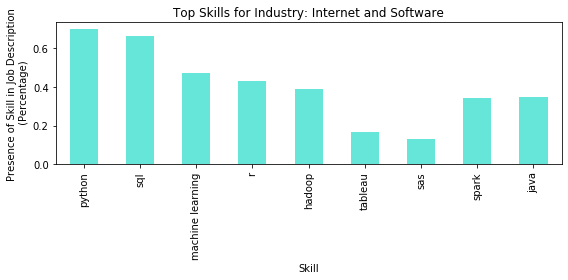

In [130]:
# IS W/out Others
plt.clf()

ISbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Internet and Software']]
ISbar = ISbar.set_index(['Skill'])
ISbar 

x_axis = ISbar['Internet and Software']
x_axis.plot(kind="bar",  figsize=(8,4), align="center", width=0.5, color='turquoise', alpha=0.8)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Internet and Software")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")

# Save Plot
plt.savefig('../04._Output/ISbar_no_others.png')

plt.tight_layout()
plt.show()

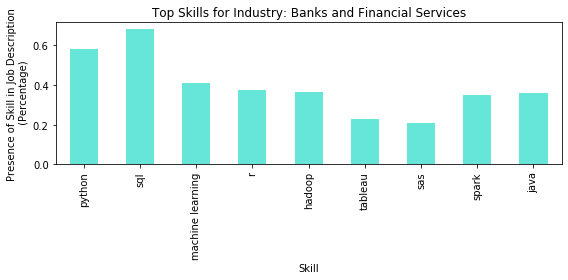

In [131]:
# BFS W/out Others
plt.clf()
BFSbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Banks and Financial Services']]
BFSbar = BFSbar.set_index(['Skill'])
BFSbar 

x_axis = BFSbar['Banks and Financial Services']
x_axis.plot(kind="bar",  figsize=(8,4), align="center", width=0.5, color='turquoise', alpha=0.8)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Banks and Financial Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


# Save Plot
plt.savefig('../04._Output/BFSbar_no_others.png')
plt.tight_layout()
plt.show()

In [132]:
# # HC W/out Others
# plt.clf()
# HCbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Health Care']]
# HCbar = HCbar.set_index(['Skill'])
# HCbar 

# x_axis = HCbar['Health Care']
# x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# # Set a title and labels for the chart
# plt.title("Top Skills for Industry: Health Care")
# plt.xlabel("Skill")
# plt.ylabel("Presence of Skill in Job Description\n (Percentage)")

# # Save Plot
# plt.savefig('../04._Output/HCbar_no_others.png')

# plt.tight_layout()
# plt.show()


# # I W/out Others
# plt.clf()
# Ibar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Insurance']]
# Ibar = Ibar.set_index(['Skill'])
# Ibar 

# x_axis = Ibar['Insurance']
# x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# # Set a title and labels for the chart
# plt.title("Top Skills for Industry: Insurance")
# plt.xlabel("Skill")
# plt.ylabel("Presence of Skill in Job Description\n (Percentage)")

# # Save Plot
# plt.savefig('../04._Output/Ibar_no_others.png')

# plt.tight_layout()
# plt.show()

In [133]:
# df_cram_1 = df1.loc[:,['<80000', '80000-99999','100000-119999',\
#                      '120000-139999','140000-159999','>160000', \
#                      'python', 'sql', 'machine learning', 'r', \
#                       'hadoop', 'spark', 'java', 'tableau', \
#                        'datamining', 'hive', 'sas', 'bigdata',\
#                        'aws', 'scala', 'nosql', 'c/c++'
#                       ]]
# df_cram_1

# def cramers_V(var1,var2):
#   # Cross table building
#   crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
#   # Keeping of the test statistic of the Chi2 test
#   stat = chi2_contingency(crosstab)[0] 
#   obs = np.sum(crosstab) # Number of observations
#   # Take the minimum value between the columns and the rows of the cross table
#   mini = min(crosstab.shape)-1 
#   return (stat/(obs*mini))

# rows= []

# for var1 in df_cram_1:
#   col = []
#   for var2 in df_cram_1 :
#     cramers =cramers_V(df_cram_1[var1], df_cram_1[var2]) # Cramer's V test
#     col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
#   rows.append(col)
  
# cramers_results_1 = np.array(rows)
# df_cram_sum_1 = pd.DataFrame(cramers_results_1, columns = df_cram_1.columns, \
#                            index =df_cram_1.columns)
# df_cram_sum_1
  
# # cramers_results = np.array(rows)
# # df_cram_sum = pd.DataFrame(cramers_results, columns = df_cram.columns, index =df_cram.columns)
# # df_cram_sum

# mask = np.zeros_like(df_cram_sum_1, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True


# with sns.axes_style("white"):
#   ax = sns.heatmap(df_cram_sum_1, mask=mask,vmin=0., vmax=1, square=True)

# # plt.show()

In [134]:
# '>160000', 'Consulting and Business Services' - Short
X = df1[[
    'Consulting and Business Services', \
    'python', \
    'sql', \
    'machine learning', \
    'hadoop', \
    'spark', \
    'tableau', \
    'datamining', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'c/c++',  \
    'linux', \
    'tensorflow', \
    'kafka', \
    'azure', \
    'pig', \
    'git', \
    'softwaredevelopment', \
    'docker', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you 
# may add additional variables within the brackets
Y = df1['>160000']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
# X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                >160000   R-squared (uncentered):                   0.107
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              29.72
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                   1.49e-111
Time:                        14:18:58   Log-Likelihood:                         -359.80
No. Observations:                5239   AIC:                                      761.6
Df Residuals:                    5218   BIC:                                      899.4
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [135]:
# '>160000', 'Consulting and Business Services' - Short
X = df1[[
    'Internet and Software', \
    'Banks and Financial Services', \
    'Health Care', \
    'Insurance',
    'CA', \
    'NY', \
    'MA', \
    'VA', \
    'DC', \
    'Consulting and Business Services', \
    'python', \
    'sql', \
    'machine learning', \
    'r', \
    'hadoop', \
    'spark', \
    'java', \
    'tableau', \
    'datamining', \
    'hive', 'sas', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'nosql',  \
    'c/c++',  \
    'naturallanguageprocessing', \
    'oracle', \
    'datawarehouse', \
    'linux', \
    'ai', \
    'microsoftsqlserver', \
    'tensorflow', \
    'kafka', \
    'dataanalysis', \
    'azure', \
    'matlab', \
    'microsoftoffice', \
    'scripting', \
    'pig', \
    'git', \
    'microsoftpowerpoint', \
    'excel', \
    'designexperience', \
    'javascript', \
    'hbase', \
    'cassandra', \
    'postgresql', \
    'mysql', \
    'perl', \
    'spss', \
    'softwaredevelopment', \
    'shellscripting', \
    'datascience', \
    'docker', \
    'mongodb', \
    '.net', \
    'projectmanagement', \
    'businessintelligence', \
    's3'         
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you 
# may add additional variables within the brackets
Y = df1['Salary_Index']
 
# # with sklearn
# regr = linear_model.LinearRegression()
# regr.fit(X, Y)


# # with statsmodels
X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Salary_Index   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     62.92
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:18:58   Log-Likelihood:                -7943.6
No. Observations:                5239   AIC:                         1.601e+04
Df Residuals:                    5178   BIC:                         1.641e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [136]:
# 'Sal_Ind_Cat4-5-6', 'Consulting and Business Services' - Short
X = df1[[
    'CA', \
    'NY', \
    'MA', \
    'VA', \
    'DC', \
    'Consulting and Business Services', \
    'python', \
    'sql', \
    'machine learning', \
    'hadoop', \
    'spark', \
    'tableau', \
    'datamining', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'c/c++',  \
    'linux', \
    'tensorflow', \
    'kafka', \
    'azure', \
    'pig', \
    'git', \
    'softwaredevelopment', \
    'docker', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you 
# may add additional variables within the brackets
Y = df1['Sal_Ind_Cat4-5-6']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Sal_Ind_Cat4-5-6   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     87.99
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:18:58   Log-Likelihood:                -2828.8
No. Observations:                5239   AIC:                             5712.
Df Residuals:                    5212   BIC:                             5889.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [137]:
# 'Sal_Ind_Cat4-5-6',     
# 'Consulting and Business Services', \
# 'Internet and Software', \
#     'Banks and Financial Services', \
#     'Health Care', \
#     'Insurance', 
# - Long

X = df1[[
    'Consulting and Business Services', \
    'Internet and Software', \
    'Banks and Financial Services', \
    'Health Care', \
    'Insurance',
    'CA',\
    'NY', \
    'VA', \
    'MA', \
    'DC', \
    'WA', \
    'python', \
    'sql', \
    'machine learning', \
    'hadoop', \
    'spark', \
    'java', \
    'datamining', \
    'aws',  \
    'scala',  \
    'nosql',  \
    'naturallanguageprocessing', \
    'oracle', \
    'datawarehouse', \
    'ai', \
    'microsoftsqlserver', \
    'kafka', \
    'dataanalysis', \
    'azure', \
    'matlab', \
    'microsoftoffice', \
    'pig', \
    'microsoftpowerpoint', \
    'designexperience', \
    'cassandra', \
    'perl', \
    'softwaredevelopment', \
    'projectmanagement', \
    'businessintelligence', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you 
# may add additional variables within the brackets
Y = df1['Salary_Index']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:           Salary_Index   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     89.17
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:18:58   Log-Likelihood:                -8009.4
No. Observations:                5239   AIC:                         1.610e+04
Df Residuals:                    5198   BIC:                         1.637e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
# output_data_v1 = merge_df.to_csv(r'../04._Output/output_data_v1.csv') 